In [2]:
import pandas as pd
import os

1- Merge the 12 months of sales into a single CSV file 

In [3]:
files = [file for file in os.listdir("C:\\Users\\DELL\\OneDrive\\Bureau\\selfeducations\\projects\\sales project DS\\data sales")]
all_months_data = pd.DataFrame()
for file in files : 
    df = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Bureau\\selfeducations\\projects\\sales project DS\\data sales\\"+file)
    all_months_data = pd.concat([all_months_data,df])
all_months_data.to_csv("all_data.csv",index = False )


In [4]:
all_data = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Bureau\\selfeducations\\projects\\sales project DS\\data sales\\all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
all_data.shape

(186850, 6)

we gonna make a copie of data in case we do any error : 


In [6]:
all_data_copie01 = all_data  

2- Augmente data with columns : 


    2-1 : add month columns : 

In [7]:
all_data["Month"] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


    2-2 drop row with NaN : 

In [8]:
all_data = all_data.dropna(axis = 0)

In [9]:
len(all_data.index)

186305

In [10]:
len(all_data_copie01.index)


186850

    3-3 add sales columns : 

** make it the 2 columns quantity ordered and price each float : 


In [11]:
all_data.loc[515:520]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
515,177051,Wired Headphones,2,11.99,04/07/19 08:41,"777 Adams St, Boston, MA 02215",04
516,177052,USB-C Charging Cable,2,11.95,04/02/19 09:30,"532 Walnut St, San Francisco, CA 94016",04
517,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215",04
518,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301",04
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
520,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301",04


In [12]:
all_data = all_data[all_data["Order Date"].str[0:2]!='Or']
 

In [13]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

In [14]:
all_data["Sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]


In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


    3-4 add city column : 

In [19]:
def get_city(adresse):
    return adresse.split(',')[1]
def get_state(adresse):
    return adresse.split(',')[2].split(' ')[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


4- best months sales : 
    

In [20]:
results = all_data.groupby('Month').sum()
results

C:\Users\DELL\AppData\Local\Temp\ipykernel_9052\894706187.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1811768.38,1822256.73
02,13449,2188884.72,2202022.42
03,17005,2791207.83,2807100.38
04,20558,3367671.02,3390670.24
05,18667,3135125.13,3152606.75
06,15253,2562025.61,2577802.26
07,16072,2632539.56,2647775.76
08,13448,2230345.42,2244467.88
09,13109,2084992.09,2097560.13


In [21]:
import matplotlib.pyplot as plt 

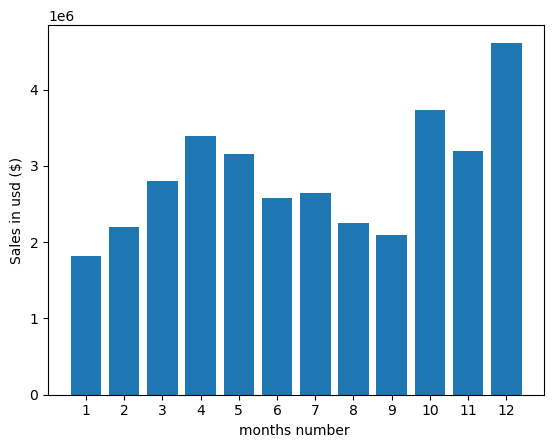

In [22]:
Months = range(1,13)
plt.bar(Months,results['Sales'])
plt.xticks(Months)
plt.ylabel('Sales in usd ($)')
plt.xlabel('months number ')
plt.show()

5- what city had the highest number of sales ? 

In [23]:
result_city = all_data.groupby('City').sum()
result_city

C:\Users\DELL\AppData\Local\Temp\ipykernel_9052\396878498.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_city = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


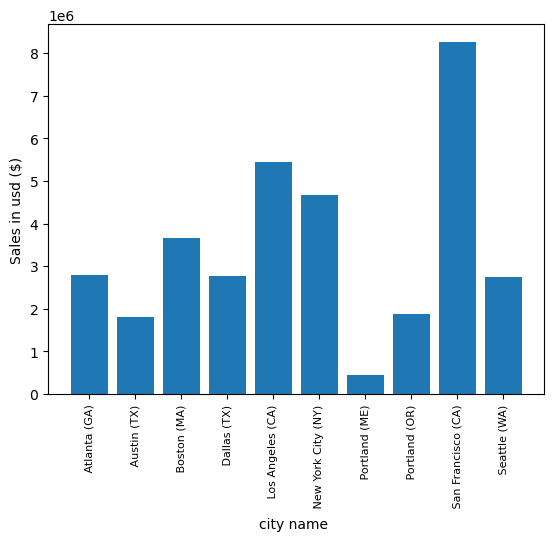

[' Atlanta (GA)',
 ' Austin (TX)',
 ' Boston (MA)',
 ' Dallas (TX)',
 ' Los Angeles (CA)',
 ' New York City (NY)',
 ' Portland (ME)',
 ' Portland (OR)',
 ' San Francisco (CA)',
 ' Seattle (WA)']

In [24]:
cities = [city for city,df in all_data.groupby('City')]
plt.bar(cities,result_city['Sales'])
plt.xticks(cities,rotation = 'vertical', size = 8)
plt.ylabel("Sales in usd ($)")
plt.xlabel("city name ")
plt.show()
cities

6- what time should we display advertisements likelihood of customer's buying product ?

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


In [29]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


In [35]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9,27,1


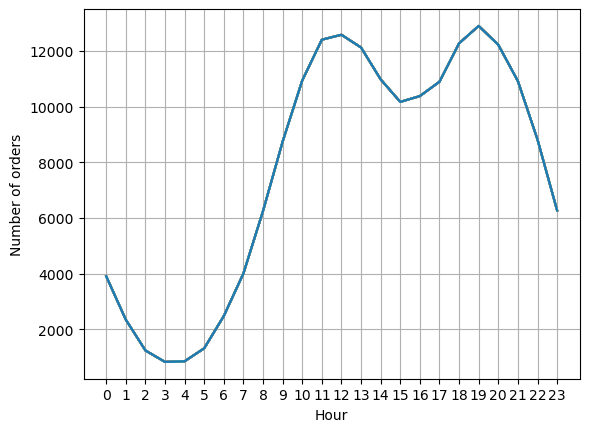

In [43]:
hours = [hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()


In [39]:
result = all_data.groupby('Hour').sum()
result

C:\Users\DELL\AppData\Local\Temp\ipykernel_9052\2266031566.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = all_data.groupby('Hour').sum()


,Quantity Ordered,Price Each,Sales,Minute,count
Hour,,,,,
0,4428,709296.70,713721.27,103596,3910
1,2619,458490.00,460866.88,61807,2350
2,1398,233833.64,234851.44,32508,1243
3,928,144726.42,145757.89,23044,831
4,937,162058.18,162661.01,26876,854
5,1493,229621.21,230679.82,42877,1321
6,2810,445000.11,448113.00,80343,2482
7,4556,740568.11,744854.12,127447,4011
8,7002,1185970.62,1192348.97,198135,6256


7-what product are most often sold togethor ? 

In [65]:
DF = all_data[all_data['Order ID'].duplicated(keep= False )]
DF['grouped']= DF.groupby('Order ID')['Product'].transform(lambda x :','.join(x))
DF = DF[['Order ID','grouped']].drop_duplicates()
DF.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9052\3825171095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['grouped']= DF.groupby('Order ID')['Product'].transform(lambda x :','.join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


C:\Users\DELL\AppData\Local\Temp\ipykernel_9052\759627908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston (MA),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [71]:
from itertools import combinations 
from collections import Counter 
count = Counter()
for row in DF['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10) : 
    print(key,value)
        

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [73]:
product_group = all_data.groupby('Product')
product_group.sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9052\2905097574.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_group.sum()


,Quantity Ordered,Price Each,Sales,Hour,Minute,count
Product,,,,,,
20in Monitor,4129,451068.99,454148.71,58764,122252,4101
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,90916,184331,6230
27in FHD Monitor,7550,1125974.93,1132424.50,107540,219948,7507
34in Ultrawide Monitor,6199,2348718.19,2355558.01,89076,183480,6181
AA Batteries (4-pack),27635,79015.68,106118.40,298342,609039,20577
AAA Batteries (4-pack),31017,61716.59,92740.83,297332,612113,20641
Apple Airpods Headphones,15661,2332350.00,2349150.00,223304,455570,15549
Bose SoundSport Headphones,13457,1332366.75,1345565.43,192445,392603,13325
Flatscreen TV,4819,1440000.00,1445700.00,68815,142789,4800


AttributeError: 'function' object has no attribute 'head'

C:\Users\DELL\AppData\Local\Temp\ipykernel_9052\93901843.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Quantity_ordered = product_group.sum()['Quantity Ordered']


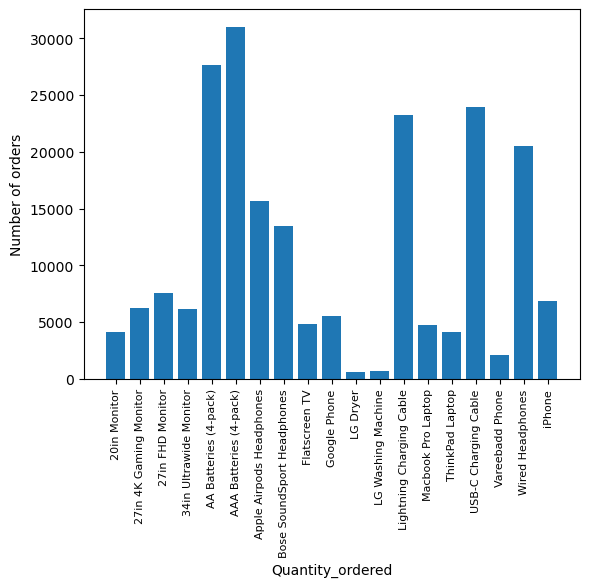

In [74]:
Quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product,df in product_group]
plt.bar(products, Quantity_ordered)
plt.xticks('Product')
plt.xlabel('Quantity_ordered')
plt.ylabel('Number of orders')
plt.xticks(products,rotation = 'vertical',size = 8)
plt.show()

In [75]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_9052\2294271103.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']


C:\Users\DELL\AppData\Local\Temp\ipykernel_9052\665085444.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation = 'vertical',size = 8)


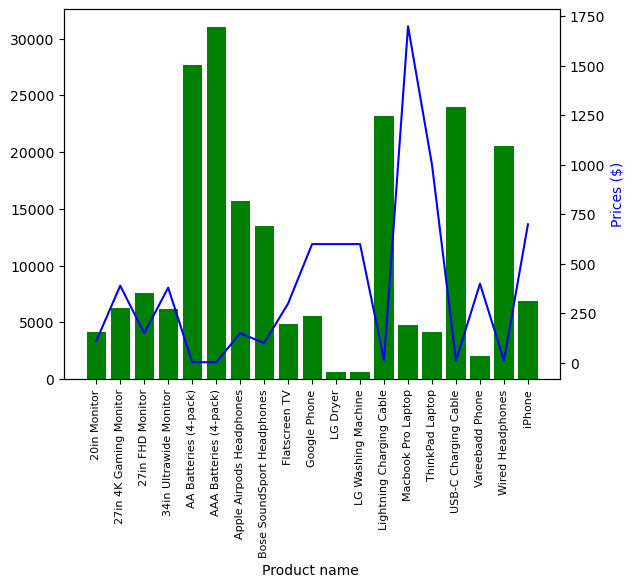

In [80]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,Quantity_ordered,color = 'g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product name ')
ax2.set_ylabel('Quantuty ordered',color = 'g')
ax2.set_ylabel('Prices ($)',color = 'b')
ax1.set_xticklabels(products,rotation = 'vertical',size = 8)
plt.show()